In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from forest_2 import *
from dqn import *

%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

config_map = {
            'rewards' : {'mushroom' : 10,
                    'carniv' : -100,
                    'tree' : 5,
                    'nothing' : -0.5,
                    'trap' : -5},
            'value' : {'agent' : 7,
                    'mushroom' : 29,
                    'carniv' : -99,
                    'tree' : 19,
                    'nothing' : 0.5,
                    'trap' : -4},
            'amount' : {'mushroom' : 2000,
                    'carniv' : 90,
                    'tree' : 1000,
                    'trap' : 200},
            'vision': 13,
            'mushroom_revive': 100,
            'carniv_th': 4,
            'carniv_giveup': 0.3
            }

features = config_map['vision']

env = Forest_2(map_size = [100, 100],
               map_para = config_map)
env.test()

SUCCESS!


In [2]:
RL = DeepQNet(n_actions=5,
            n_features=features,
            learning_rate=0.01,
            reward_decay=0.9 ,
            e_greedy=0.1,
            replace_target_iter=200,
            memory_size=2000,
            useConvNet = True
            # output_graph=True
            )
with tf.Session() as sess:
    #saver = tf.train.Saver()
    #sess.run(tf.global_variables_initializer())
    train(env, RL, episode = 30000, vision = config_map['vision'])
    #saver.save(sess, 'model/{}'.format('c32@3-c32@3-d50-d50_vi13_epi300_Adam'))
    #env.mainloop()
    RL.plot_cost()

No.1 episode!
0,cost:1221
No.2 episode!
No.3 episode!
No.4 episode!
No.5 episode!
No.6 episode!
No.7 episode!
No.8 episode!
5000,cost:294
No.9 episode!


KeyboardInterrupt: 

In [2]:
RLtest = DeepQNet(n_actions=5,
            n_features=features,
            learning_rate=0.01,
            reward_decay=0.9,
            e_greedy=0.1,
            replace_target_iter=200,
            memory_size=2000,
            useConvNet = True
            # output_graph=True
            )
with tf.Session() as sess:
    loader = tf.train.Saver()
    pos = env.init_env(refresh = False)
    observation = env.get_observation().flatten()
    total_rewards = 100
    loader.restore(sess, 'model/conv32@3-conv32@3-dense50-dense50_vision13_episode300')
    for i in range(100):
        env.print_observation()

        #action = RL.choose_action(observation)  
        observation = observation[np.newaxis, :]
        actions_value = RLtest.sess.run(RLtest.q_eval, feed_dict={RLtest.s: observation.reshape(1,RLtest.n_features,RLtest.n_features,1)})
        action = np.argmax(actions_value)

        reward = env.get_reward(action)
        total_rewards += reward
        observation_ = env.get_observation().flatten()
        #RLtest.store_transition(observation, action, reward, observation_)
        observation = observation_
        if (total_rewards<0):
            break

INFO:tensorflow:Restoring parameters from model/conv32@3-conv32@3-dense50-dense50_vision13_episode300
■ ■ X T T ■ ■ ■ ■ ■ ■ ■ ■ 
X ■ T ■ ■ ■ ■ ■ T ■ ■ T T 
■ ■ ■ X ■ ■ ■ ■ ■ ■ ■ T ■ 
■ ■ ■ ■ ■ ■ T ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ T T ■ ■ ■ ■ ■ ■ ■ 
■ ■ X ■ ■ ■ ■ ■ ■ T ■ ■ T 
■ ■ ■ C T T X ■ ■ ■ ■ ■ ■ 
■ X ■ ■ ■ ■ ■ ■ ■ ■ ■ T ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ T ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
X X X X X X X W X X X X X 
X X W X X X X X X X X X X 
X X X X X X X X X X X X X 

■ ■ ■ ■ C C ■ ■ ■ ■ ■ ■ ■ 
■ ■ X T T ■ ■ ■ ■ ■ ■ ■ ■ 
X ■ T ■ ■ ■ ■ ■ T ■ ■ T T 
■ ■ ■ X ■ ■ ■ ■ ■ ■ ■ T ■ 
■ ■ ■ ■ ■ ■ T ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ T T ■ ■ ■ ■ ■ ■ ■ 
■ ■ X ■ ■ ■ X ■ ■ T ■ ■ T 
■ ■ ■ C T T ■ ■ ■ ■ ■ ■ ■ 
■ W ■ ■ ■ ■ ■ ■ ■ ■ ■ T ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ T ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
X X W X X X X X X X X X X 
X X X X X X X X X X X X X 

■ ■ ■ ■ ■ C C ■ ■ ■ ■ ■ ■ 
■ ■ ■ X T T C ■ ■ ■ ■ ■ ■ 
T X ■ T ■ ■ ■ ■ ■ T ■ ■ T 
■ ■ ■ ■ X ■ ■ ■ ■ ■ ■ ■ T 
T ■ ■ ■ ■ ■ ■ T ■ ■ ■ ■ ■ 
X ■ ■ ■ ■ T T ■ ■ ■ ■ ■ ■ 
■ ■ ■ X ■ ■ X ■ ■ ■ T ■ ■ 
■ ■ ■

■ ■ ■ ■ ■ T ■ ■ C T ■ ■ T 
T ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ T ■ C C C ■ C C ■ 
T ■ ■ T ■ ■ ■ ■ C ■ ■ C C 
■ ■ C ■ ■ ■ ■ ■ C T ■ ■ ■ 
■ ■ C C C C ■ ■ C T ■ ■ ■ 
■ ■ ■ T C C X C C X ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ T ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ X C T ■ T ■ ■ ■ ■ ■ 
■ ■ ■ C C ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ C ■ ■ ■ ■ ■ ■ T 
■ T ■ ■ ■ T ■ ■ T ■ ■ ■ T 

■ ■ ■ ■ ■ ■ ■ T C T ■ ■ ■ 
■ ■ ■ ■ ■ T ■ ■ C T ■ ■ T 
T ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ T ■ C C C ■ C C ■ 
T ■ ■ T ■ ■ ■ ■ C ■ ■ C C 
■ ■ C ■ ■ ■ ■ ■ C T ■ ■ ■ 
■ ■ C C C C X ■ C T ■ ■ ■ 
■ ■ ■ T C C ■ C C X ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ T ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ X C T ■ T ■ ■ ■ ■ ■ 
■ ■ ■ C C ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ C ■ ■ ■ ■ ■ ■ T 

■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ T 
■ ■ ■ ■ ■ ■ ■ T C T ■ ■ ■ 
■ ■ ■ ■ ■ T ■ ■ C T ■ ■ T 
T ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ T ■ C C C ■ C C ■ 
T ■ ■ T ■ ■ ■ ■ C ■ ■ C C 
■ ■ C ■ ■ ■ X ■ C T ■ ■ ■ 
■ ■ C C C C ■ ■ C T ■ ■ ■ 
■ ■ ■ T C C ■ C C X ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ T ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ ■ ■ ■ ■ 

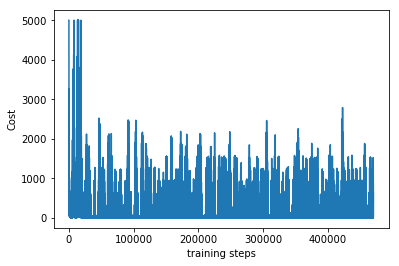

In [8]:
RL.plot_cost()

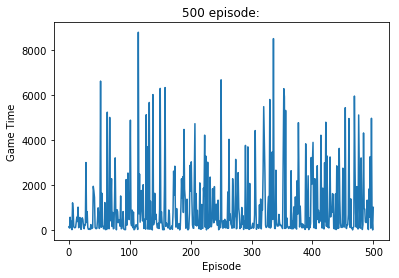

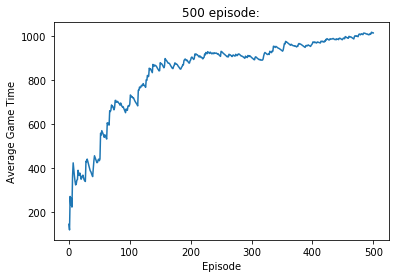

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#plt.figure(1)
log_gameTime = np.load('plt_data/game_time_500.npy')
plt.plot(np.arange(len(log_gameTime)), log_gameTime)
plt.ylabel('Game Time')
plt.xlabel('Episode')
plt.title('500 episode:')
plt.show()

average_time = []
accumulator = 0
count = 0
for i in range(len(log_gameTime)):
    count += 1
    accumulator += log_gameTime[i]
    average_time.append(accumulator/count)
plt.plot(np.arange(len(average_time)), average_time)
plt.ylabel('Average Game Time')
plt.xlabel('Episode')
plt.title('500 episode:')
plt.show()

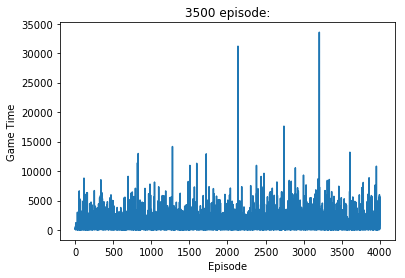

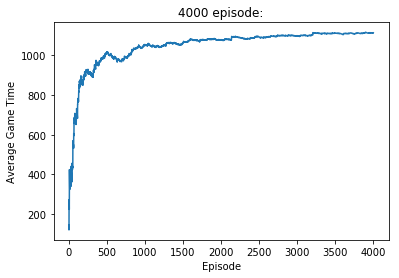

1114.54186453


In [12]:
import numpy as np
import matplotlib.pyplot as plt
#plt.figure(1)
log_gameTime = np.load('plt_data/game_time_4000.npy')
plt.plot(np.arange(len(log_gameTime)), log_gameTime)
plt.ylabel('Game Time')
plt.xlabel('Episode')
plt.title('3500 episode:')
plt.show()

average_time = []
accumulator = 0
count = 0
for i in range(len(log_gameTime)):
    count += 1
    accumulator += log_gameTime[i]
    average_time.append(accumulator/count)
plt.plot(np.arange(len(average_time)), average_time)
plt.ylabel('Average Game Time')
plt.xlabel('Episode')
plt.title('4000 episode:')
plt.show()
print(average_time[-1])

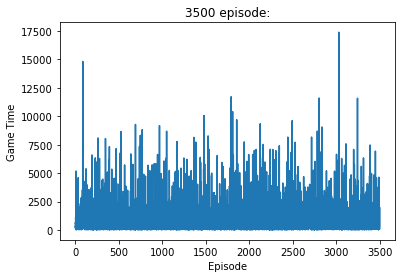

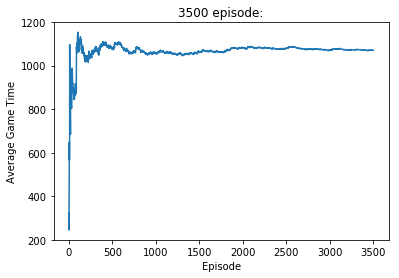

1070.18423308


In [11]:
import numpy as np
import matplotlib.pyplot as plt
#plt.figure(1)
log_gameTime = np.load('plt_data/c64@3-c64@3-d100-d100-d100_game_time_3500.npy')
plt.plot(np.arange(len(log_gameTime)), log_gameTime)
plt.ylabel('Game Time')
plt.xlabel('Episode')
plt.title('3500 episode:')
plt.show()

average_time = []
accumulator = 0
count = 0
for i in range(len(log_gameTime)):
    count += 1
    accumulator += log_gameTime[i]
    average_time.append(accumulator/count)
plt.plot(np.arange(len(average_time)), average_time)
plt.ylabel('Average Game Time')
plt.xlabel('Episode')
plt.title('3500 episode:')
plt.show()
print(average_time[-1])



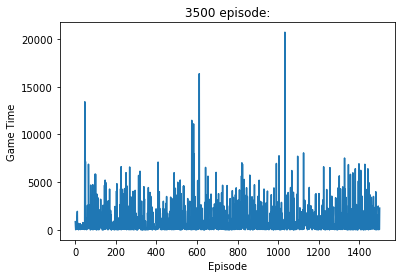

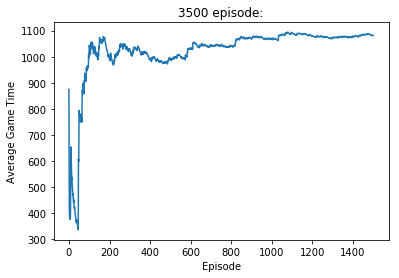

1081.16189207


In [10]:
import numpy as np
import matplotlib.pyplot as plt
#plt.figure(1)
log_gameTime = np.load('plt_data/d100-d100_game_time_1500.npy')
plt.plot(np.arange(len(log_gameTime)), log_gameTime)
plt.ylabel('Game Time')
plt.xlabel('Episode')
plt.title('3500 episode:')
plt.show()

average_time = []
accumulator = 0
count = 0
for i in range(len(log_gameTime)):
    count += 1
    accumulator += log_gameTime[i]
    average_time.append(accumulator/count)
plt.plot(np.arange(len(average_time)), average_time)
plt.ylabel('Average Game Time')
plt.xlabel('Episode')
plt.title('3500 episode:')
plt.show()
print(average_time[-1])
